# Simple Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1) Load the data 

In [5]:
d = {
    'Area(sqft)' : [2600,3000,3200,3600,4000],
    'Price' : [550000,565000,610000,680000,725000]
}

print(d)
print(type(d))

{'Area(sqft)': [2600, 3000, 3200, 3600, 4000], 'Price': [550000, 565000, 610000, 680000, 725000]}
<class 'dict'>


##### For ML Prediction :
    x = Dataframe / 2D array / List of Lists <br>
    Y = Series

In [8]:
df = pd.DataFrame(d)
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,Area(sqft),Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


#### Problem Statement - Based on Area(sqft) predict the price 
a) Area(sqft) = 4400 <br>
b) Area(sqft) = 3450

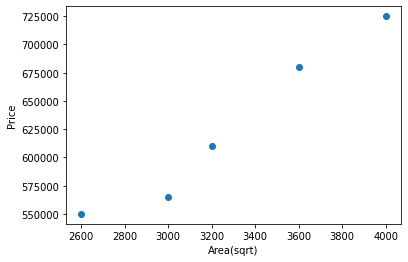

In [10]:
plt.scatter(df['Area(sqft)'], df['Price'])
plt.xlabel('Area(sqrt)')
plt.ylabel('Price')
plt.show()

In [12]:
x = df[['Area(sqft)']]
y = df['Price']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(5, 1)
(5,)


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# creating model 1
m1 = LinearRegression()
m1.fit(x,y)

# model.fit() - this function trains the model on the provided data

LinearRegression()

In [16]:
# R2 score - performance indicator of the model (R2 score > 0.85 is good)

print("R2 Score = ", m1.score(x,y))

R2 Score =  0.9584301138199486


In [17]:
# predicting the price for the same x values
ypred_m1 = m1.predict(x)
print(ypred_m1)

[533664.38356164 587979.45205479 615136.98630137 669452.05479452
 723767.12328767]


In [19]:
df['Price_Predicted'] = ypred_m1
df

,Area(sqft),Price,Price_Predicted
0,2600,550000,533664.383562
1,3000,565000,587979.452055
2,3200,610000,615136.986301
3,3600,680000,669452.054795
4,4000,725000,723767.123288


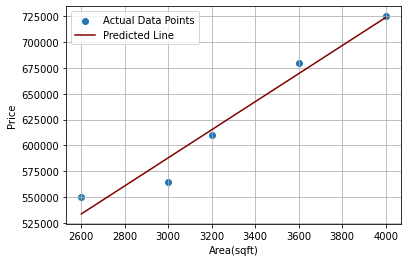

In [22]:
plt.scatter(df['Area(sqft)'], df['Price'], label='Actual Data Points')
plt.plot(df['Area(sqft)'], df['Price_Predicted'], label='Predicted Line', color='maroon')
plt.xlabel('Area(sqft)')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [23]:
# linear regression line =>  y_predicted = m*x + c
# m = slope(coefficient) & c = intercept

m = m1.coef_
c = m1.intercept_

print("Coefficient (m) = ",m)
print("Intercept (c) = ",c)

Coefficient (m) =  [135.78767123]
Intercept (c) =  180616.43835616432


In [24]:
# price prediction eqn => Area*m + c

df['Price_Predicted_by_Equation'] = df['Area(sqft)']*m + c 
df

,Area(sqft),Price,Price_Predicted,Price_Predicted_by_Equation
0,2600,550000,533664.383562,533664.383562
1,3000,565000,587979.452055,587979.452055
2,3200,610000,615136.986301,615136.986301
3,3600,680000,669452.054795,669452.054795
4,4000,725000,723767.123288,723767.123288


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
# these functions take two parameters - y_test_data & y_predicted_data

def gen_matrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print("MAE = ", mae)
    print("MSE = ", mse)
    print("RMSE = ", rmse)
    print("R2_Score = ", r2)

In [30]:
gen_matrics(y, ypred_m1)
print("r2_score : ", m1.score(x,y))

MAE =  11246.57534246575
MSE =  186815068.4931509
RMSE =  13668.030893042014
MAE =  0.9584301138199486
r2_score :  0.9584301138199486


### Making Predictions

#### Problem Statement - Based on Area(sqft) predict the price
a) Area(sqft) = 4400 <br>
b) Area(sqft) = 3450

In [31]:
# the predict function take x dataframe/list_of_lists/2d_array and then give y prediction data

# method 1
ypred_4400_w1 = m1.predict([[4400]])
ypred_3450_w1 = m1.predict([[3450]])

print("Method 1 o/p :")
print("ypred_4400_w1 = ",ypred_4400_w1)
print("ypred_3450_w1 = ",ypred_3450_w1)

# method2
ypred_4400_w2 = 4400*m + c
ypred_3450_w2 = 3450*m + c

print("Method 2 o/p :")
print("ypred_4400_w2 = ",ypred_4400_w2)
print("ypred_3450_w2 = ",ypred_3450_w2)

Method 1 o/p :
ypred_4400_w1 =  [778082.19178082]
ypred_3450_w1 =  [649083.90410959]
Method 2 o/p :
ypred_4400_w2 =  [778082.19178082]
ypred_3450_w2 =  [649083.90410959]


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###### we can find that both the methods of prediction gave similar result

# Multiple Linear Regression

### Problem Statement : Based on Area, Bedrooms, Age predict the Price of House

In [52]:
d2 = {
    'area' : [2600, 3000, 3200, 3600, 4000],
    'bedrooms' : [3.0, 4.0, None, 3.0, 5.0],
    'age' : [20, 15, 18, 30, 8],
    'price' : [550000,565000,610000,595000,760000]
}

df2 = pd.DataFrame(d2)
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [53]:
df2.isnull().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [55]:
# either we should delete the null value or fill it with mean or median data
mean_bed = df2['bedrooms'].mean()
median_bed = df2['bedrooms'].median()
print("mean_bed = ", mean_bed)
print("median_bed = ", median_bed)

mean_bed =  3.75
median_bed =  3.5


In [56]:
# as the bedrooms are in whole number we should substitute a whole number
df2['bedrooms'].fillna(round(mean_bed), inplace=True)
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [59]:
# lets segregate the x and y values for training
x2 = df2[['area', 'bedrooms', 'age']]
y2 = df2['price']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(5, 1)
(5,)


In [60]:
# creating a model and training it with data
m2 = LinearRegression()
m2.fit(x2,y2)

LinearRegression()

In [62]:
# r2 score
print("r2_score = ", m2.score(x2,y2))

r2_score =  0.9616624063426549


In [63]:
# predicting y values
ypred_m2 = m2.predict(x2)
print(ypred_m2)

[542163.48289649 589489.11594847 590408.70724123 600387.60550866
 757551.08840515]


In [64]:
# find the m=slope(coefficient) & c=intercept
m = m2.coef_
c = m2.intercept_
print("m = ", m)
print("c = ", c)

m =  [   165.47645491 -72491.11505997 -10725.23322968]
c =  543902.7099067082


In [67]:
df2['Pred_price'] = ypred_m2
df2['Pred_price_eqn'] = df2['area']*m[0] + df2['bedrooms']*m[1] + df2['age']*m[2] + c
df2

,area,bedrooms,age,price,Pred_price,Pred_price_eqn
0,2600,3.0,20,550000,542163.482896,542163.482896
1,3000,4.0,15,565000,589489.115948,589489.115948
2,3200,4.0,18,610000,590408.707241,590408.707241
3,3600,3.0,30,595000,600387.605509,600387.605509
4,4000,5.0,8,760000,757551.088405,757551.088405


In [69]:
gen_matrics(y2, ypred_m2)
print("r2_score = ", m2.score(x2,y2))

MAE =  11950.688582852064
MSE =  215994002.66548243
RMSE =  14696.734421819101
MAE =  0.9616624063426549
r2_score =  0.9616624063426549


#### Predict price of house when :
    Area = 4250, Bedroom = 5, Age = 7

In [71]:
ypred_test_w1 = m2.predict([[4250, 5, 7]])
ypred_test_w2 = 4250*m[0] + 5*m[1] + 7*m[2] + c

print("ypred_test_w1 = ", ypred_test_w1)
print("ypred_test_w2 = ", ypred_test_w2)

ypred_test_w1 =  [809645.43536206]
ypred_test_w2 =  809645.4353620613


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
